# Exercise 3.5 Stippling (cartopy)
prepared by M.Hauser

Stippling in in pyplot is done with the function `contourf`.

Note that most of what we show here for georeferenced plots also applies for stippling when you are not using cartopy.

## Import libraries

In [1]:
import cartopy.crs as ccrs
import cartopy.util as cutil

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import xarray as xr

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/Users/tarunchadha/anaconda3/envs/pyvis/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import mplotutils as mpu

## stippling $\rightarrow$ hatching

Stippling is called hatching in matplotlib.

`contourf`, takes a `hatches` keyword, and you have to specify one hatch-pattern per drawn level. The pattern are determined via characters, e.g. using `'/'` yields diagonal lines.

The hatching is more dense if the charachter is repeated, e.g.: `'///'`.

Specifying an empty string (`''`) ommits the hatching.

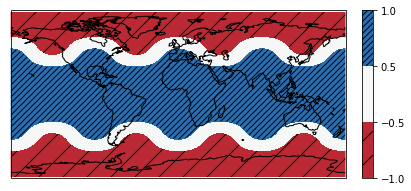

In [3]:
# create sample data
lon, lat, data = mpu.sample_data_map(90, 48)

# ====

f, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.coastlines()

DATA, LON = cutil.add_cyclic_point(data, lon)

# ====

# add 3 levels
levels = [-1, -0.5, 0.5, 1]

# set hatching for each level
hatches = ['/', '', '////' ]

h = ax.contourf(LON, lat, DATA, levels=levels, hatches=hatches, cmap='RdBu')

# ====

ax.set_global()

# add colorbar 
mpu.colorbar(h, ax, aspect=15)

plt.draw()

## Hatch patterns

Most of the hatch patterns are quite intuitive:

    patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]

They are nicely visualized in the next figure (after an [stackoverflow answer](https://stackoverflow.com/a/14279608)). Not only `contourf`, other functions also take a hatch keyword, e.g. `bar`. 

(However, `pcolormesh` does not, although the documentation says so.)

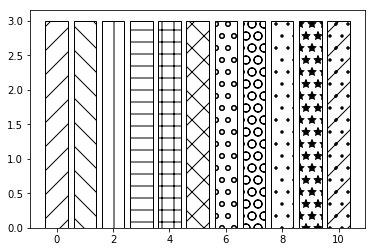

In [4]:
f, ax = plt.subplots()

patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*", '/.' ]

for i, pattern in enumerate(patterns):
    ax.bar(i, 3, color='none', edgecolor='k', hatch=pattern)


Note that \ is an escape character. Therefore, `'\'` is not a valid string. You can either escape the escape character, using `'\\'` or add a space `'\ '`.

## Load CMIP 5 data: historical precipitation climatology (1986 to 2005)

Load historical, and projected climatlological precipitation, as well as the relative change between them, from all CMIP5 models for RCP8.5 (Taylor et al., 2012).

The data was prepared in [another notebook](../data/prepare_CMIP5_map.ipynb).

In [5]:
fN = '../data/cmip5_delta_pr_rcp85_map.nc'

pr = xr.open_dataset(fN)

pr

<xarray.Dataset>
Dimensions:     (lat: 72, lon: 144)
Coordinates:
  * lon         (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * lat         (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
Data variables:
    pr_rel      (lat, lon) float64 ...
    proj        (lat, lon) float64 ...
    hist        (lat, lon) float64 ...
    agree_sign  (lat, lon) float64 ...
    pval        (lat, lon) float64 ...
Attributes:
    data:                CMIP5 precipitation (pr)
    time_periods:        hist: 1986-2005; proj: 2081-2100
    pr_delta:            (proj - hist) / hist * 100
    source:              https://data.iac.ethz.ch/atmos/
    reference:           Taylor et al., 2012
    scenario:            rcp8.5
    interpolation_grid:  2.5 x 2.5 degrees bilinear interpolation

### Exercise
 * add hatches for precipitation changes larger than +- 20 % (don't change `levels`)

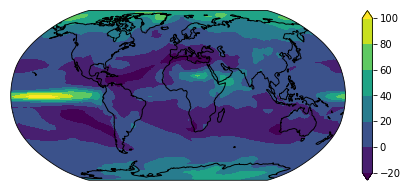

In [6]:
# get data
lon, lat, pr_rel = pr.lon.values, pr.lat.values, pr.pr_rel.values

# plot
f, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Robinson()))

ax.coastlines()

PR_REL, LON = cutil.add_cyclic_point(pr_rel, lon)

# set levels
levels = np.arange(-20, 101, 20)

# add hatches
# hatches =  [...]

h = ax.contourf(LON, lat, PR_REL, transform=ccrs.PlateCarree(), levels=levels, extend='both')

ax.set_global()

# add colorbar
mpu.colorbar(h, ax, spacing='proportional', aspect=15)

plt.draw()

### Solution

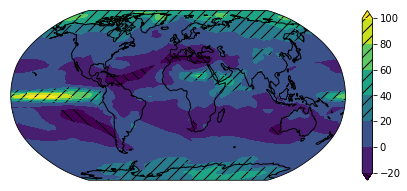

In [7]:
# get data
lon, lat, pr_rel = pr.lon.values, pr.lat.values, pr.pr_rel.values

# plot
f, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Robinson()))

ax.coastlines()

PR_REL, LON = cutil.add_cyclic_point(pr_rel, lon)

# set levels
levels = np.arange(-20, 101, 20)

# add hatches
hatches =  ['\\\\', '', '', '//', '//', '//', '//', '//']

h = ax.contourf(LON, lat, PR_REL, transform=ccrs.PlateCarree(), levels=levels, hatches=hatches, extend='both')

ax.set_global()

# add colorbar
mpu.colorbar(h, ax, spacing='proportional', aspect=15)

plt.draw()

### Better Solution

When you look closely, you can see that some of the hatch-lines are broken. It's actually better if you add a second contourf command, with only 3 levels, so that the entire area gets hatched in one go. You can then remove the colored patches with `colors='none'`:

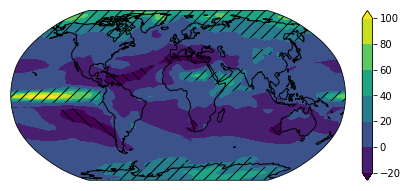

In [8]:
# get data
lon, lat, pr_rel = pr.lon.values, pr.lat.values, pr.pr_rel.values

# plot
f, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Robinson()))

ax.coastlines()

PR_REL, LON = cutil.add_cyclic_point(pr_rel, lon)

# set levels
levels = np.arange(-20, 101, 20)
h = ax.contourf(LON, lat, PR_REL, transform=ccrs.PlateCarree(), levels=levels, extend='both')


# Second contourf command, only for the hatching. Note how there is no h = ..., so that
# the colorbar is correct. 

# set levels
levels = [-20, 20]

# add hatches
hatches =  ['\\\\', '', '//']
ax.contourf(LON, lat, PR_REL, transform=ccrs.PlateCarree(), levels=levels, hatches=hatches,
                extend='both', colors='none')

ax.set_global()

# add colorbar
mpu.colorbar(h, ax, spacing='proportional', aspect=15)
plt.draw()

## Significance hatching

Often we don't want to hatch the same values that we color, but, e.g. stipple siginificant parts of the data. I recommend to do this in five steps:

1. plot contourf of the significance values
* determine the levels (e.g. `[0, 0.1, 1]`)
* add the hatches (e.g. `['...', '']`)
* remove the colors with `colors='none'` & get rid of the colorbar
* add the actual data you want to plot

### Loading Data

For this example we use data contributed by a course participant. 

The data is ranked probability skill scores (RPSS) of ECMWF system 4 seasonal tercile forecasts verified against ERA-Interim on a global 1° x 1° grid. Additionally, the dataset contains the variable `signif` that indicates grid points with a significant improvement in skill. `signinf` is given as boolean, 0 means, no imporvement, 1 means an improvement.

Due to the resolution the plotting will take a moment.

In [9]:
fN = '../data/globalRPSS.nc'

ds = xr.open_dataset(fN)
ds

<xarray.Dataset>
Dimensions:    (latitude: 181, longitude: 360)
Coordinates:
  * longitude  (longitude) float64 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * latitude   (latitude) float64 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
Data variables:
    RPSS       (latitude, longitude) float64 ...
    signif     (latitude, longitude) float64 ...

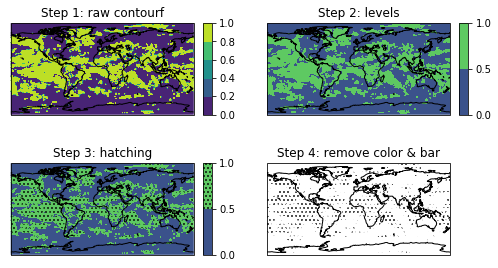

In [10]:
# create sample data

lat = ds.latitude.values

SIG, LON = cutil.add_cyclic_point(ds.signif.values, ds.longitude.values)

# =====

f, axes = plt.subplots(2, 2, subplot_kw=dict(projection=ccrs.PlateCarree()), gridspec_kw=dict(wspace=0.4))

f.set_size_inches(20 / 2.54, 12 / 2.54)
axes = axes.flatten()
# =====

ax = axes[0]
h = ax.contourf(LON, lat, SIG, 4)
mpu.colorbar(h, ax, aspect=10)
ax.set_title('Step 1: raw contourf')

# =====

ax = axes[1]
levels = [0, 0.5, 1]
h = ax.contourf(LON, lat, SIG, levels=levels)
mpu.colorbar(h, ax, aspect=10)
ax.set_title('Step 2: levels')

# =====

ax = axes[2]
levels = [0, 0.5, 1]
hatches = ['', '...']
h = ax.contourf(LON, lat, SIG, levels=levels, hatches=hatches)
mpu.colorbar(h, ax, aspect=10)
ax.set_title('Step 3: hatching')

# =====
ax = axes[3]
levels = [0, 0.5, 1]
hatches = ['', '...']
#h = ax.contourf(LON, lat, SIG, levels=levels)
h = ax.contourf(LON, lat, SIG, levels=levels, hatches=hatches, colors='none')

ax.set_title('Step 4: remove color & bar')

# =====

for ax in axes:
    ax.set_global()
    ax.coastlines()

I would not actually do a four-panel plot. But repeat the same plot over and over, doing one step after the other.

### Final figure

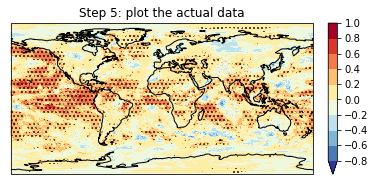

In [11]:
# get data
lat = ds.latitude.values

SIG, LON = cutil.add_cyclic_point(ds.signif.values, ds.longitude.values)

# ========================================

f, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()), gridspec_kw=dict(wspace=0.4))

f.subplots_adjust(left=0.1, right=0.8)

# =====

# plot RPSS data

levels = np.arange(-0.8, 1.1, 0.2)

# create norm & cmap to plot levels
cmap, norm = mpu.from_levels_and_cmap(levels, 'RdYlBu_r', extend='min')

h = ax.pcolormesh(*mpu.infer_interval_breaks(ds.longitude, ds.latitude, clip=True), ds.RPSS,
                  transform=ccrs.PlateCarree(), cmap=cmap, norm=norm, vmax=1, vmin=-1)

cbar = mpu.colorbar(h, ax, extendfrac=0.1, aspect=15)

levels = [0, 0.5, 1]
hatches = ['', '...']
ax.contourf(LON, lat, SIG, levels=levels, hatches=hatches, colors='none')

ax.set_title('Step 5: plot the actual data')

#ax.set_title('T2M: Ranked probability skill score, JJA')

# =====

ax.set_global()
ax.coastlines();

plt.draw()
#plt.savefig('ex3_5_stippling_RPSS.png', dpi=300)

### Exercise - Step 1

The precipitation data from CMIP5 contains p values, indicating where the change between the historical and future period is significant (note: this derived from a simple t-test, which is not necessarily appropriate for the data).

* use contourf to plot the p-values

Note: it's p-values and not a boolean indicating significance as above.

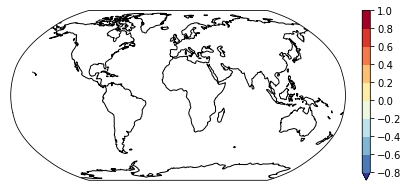

In [12]:
# get data
lon, lat, pval = pr.lon.values, pr.lat.values, pr.pval.values


# plot
f, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Robinson()))

ax.coastlines()

PVAL, LON = cutil.add_cyclic_point(pval, lon)

# plot pvalues here
#h = ax.contourf(...)
            
ax.set_global()

# add colorbar
mpu.colorbar(h, ax, spacing='proportional')

plt.draw()

### Solution

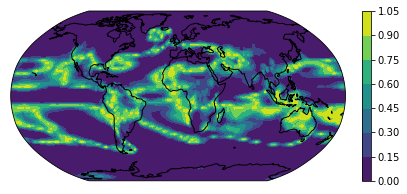

In [13]:
# get data
lon, lat, pval = pr.lon.values, pr.lat.values, pr.pval.values


# plot
f, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Robinson()))

ax.coastlines()

PVAL, LON = cutil.add_cyclic_point(pval, lon)

# plot pvalues here
h = ax.contourf(LON, lat, PVAL, transform=ccrs.PlateCarree())
            
ax.set_global()

# add colorbar
mpu.colorbar(h, ax, spacing='proportional')

plt.draw()

### Exercise - Step 2 & 3

* We want to stipple everything with a p-value smaller than 0.1: determine the levels
* add the hatches

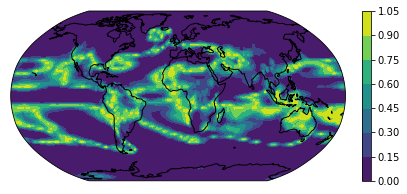

In [14]:
# get data
lon, lat, pval = pr.lon.values, pr.lat.values, pr.pval.values


# plot
f, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Robinson()))

ax.coastlines()

PVAL, LON = cutil.add_cyclic_point(pval, lon)

# set the levels
# levels = 

# add hatches
# hatches = [...]

h = ax.contourf(LON, lat, PVAL, transform=ccrs.PlateCarree())
            
ax.set_global()

# add colorbar
mpu.colorbar(h, ax, spacing='proportional')

plt.draw()

### Solution

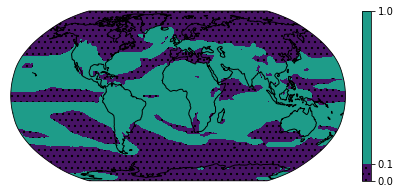

In [15]:
# get data
lon, lat, pval = pr.lon.values, pr.lat.values, pr.pval.values


# plot
f, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Robinson()))

ax.coastlines()

PVAL, LON = cutil.add_cyclic_point(pval, lon)

# set the levels
levels = [0, 0.1, 1]
# add hatches
hatches = ['..', '']

h = ax.contourf(LON, lat, PVAL, transform=ccrs.PlateCarree(), levels=levels, hatches=hatches)
            
ax.set_global()

# add colorbar
mpu.colorbar(h, ax, spacing='proportional')

plt.draw()

### Exercise - Step 4 & 5

* remove the colors with `colors='none'`
* plot the relative precipitation change below the hatches
* make sure the right data is used for the colorbar

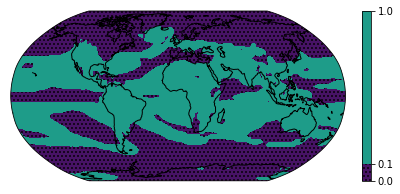

In [16]:
# get data
lon, lat, pval, pr_rel = pr.lon.values, pr.lat.values, pr.pval.values, pr.pr_rel.values

PVAL, LON = cutil.add_cyclic_point(pval, lon)
PR_REL, LON = cutil.add_cyclic_point(pr_rel, lon)

# ================

# plot
f, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Robinson()))

ax.coastlines()

# plot relative precipitation change
# h = ax.contourf(...)

# plot significance stippling
# set the levels
levels = [0, 0.1, 1]
# add hatches
hatches = ['...', '']
h = ax.contourf(LON, lat, PVAL, transform=ccrs.PlateCarree(), levels=levels, hatches=hatches)
            
ax.set_global()

# add colorbar
mpu.colorbar(h, ax, spacing='proportional')

plt.draw()

### Solution

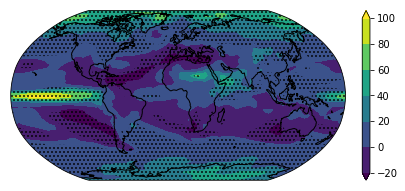

In [17]:
# get data
lon, lat, pval, pr_rel = pr.lon.values, pr.lat.values, pr.pval.values, pr.pr_rel.values

PVAL, LON = cutil.add_cyclic_point(pval, lon)
PR_REL, LON = cutil.add_cyclic_point(pr_rel, lon)

# ================

# plot
f, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Robinson()))

ax.coastlines()

# plot relative precipitation change
# set levels
levels = np.arange(-20, 101, 20)
h = ax.contourf(LON, lat, PR_REL, transform=ccrs.PlateCarree(), levels=levels, extend='both')

# plot significance stippling
# set the levels
levels = [0, 0.1, 1]
# add hatches
hatches = ['...', '']
ax.contourf(LON, lat, PVAL, transform=ccrs.PlateCarree(), levels=levels, hatches=hatches, colors='none')
            
ax.set_global()

# add colorbar
mpu.colorbar(h, ax, spacing='proportional')

plt.draw()

## Manual hatches

You can also manually add hatches, at all points that are significant. However, this leads to a hatching pattern that depends on the resolution of the data which is not desirable.

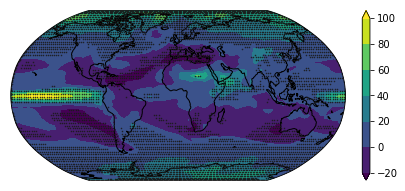

In [18]:
# get data
lon, lat, pval, pr_rel = pr.lon.values, pr.lat.values, pr.pval.values, pr.pr_rel.values

PVAL, LON = cutil.add_cyclic_point(pval, lon)
PR_REL, LON = cutil.add_cyclic_point(pr_rel, lon)

# ================

# plot
f, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Robinson()))

ax.coastlines()

# plot relative precipitation change
# set levels
levels = np.arange(-20, 101, 20)
h = ax.contourf(LON, lat, PR_REL, transform=ccrs.PlateCarree(), levels=levels, extend='both')

# 'manual' stippling

# create array with all lat/ lon combinations
LONs, lats = np.meshgrid(LON, lat)

# find significant points
sig = PVAL.flatten() <= 0.1

LONs = LONs.flatten()[sig == 1]
lats = lats.flatten()[sig == 1]

# add scatterpoints
ax.plot(LONs, lats, '.', color='0.1', transform=ccrs.PlateCarree(), ms=1)


ax.set_global()

# add colorbar
# add colorbar
mpu.colorbar(h, ax, spacing='proportional')

plt.draw()